# Homework 6

### Problem 1 (5% credit)
Describe in your own words difference between prior and posterior distribution

####Answer 1: 
Prior distribution incorporates any specific(subjective) beliefs you have about the experiment based on past experieces. If you have no specific belief you will take an uninformative prior (uniform distribution).

Posterior distribution is calculated based on the prior and depends on it. Once we conduct the experiment we modify our prior which now becomes the posterior.

### Problem 2 (5% credit)
Describe in your own words what is the conjugate distribution for a given model

####Answer 2:

If the prior distribution an posterior distribution come from the same family of distribution (example - if they are both beta distributions) then they are called conjugate distributions.

### Problem 3 (15% credit)

Consider an experiment with tossing a coin that gave 20 heads and 30 tails.

a) Describe (analytically) the posterior distribution for the probability $\alpha$ of getting a coin heads if the prior distribution is a non-informative uniform distribution.

b) Describe (analytically) the posterior distribution for the probability $\alpha$ of getting a coin heads if the prior distribution was $\alpha\sim B(3,1)$.

c) Visually compare (python plots) the resulting posteriors from points a) and b).

#### Answer 3
a) B(21,31) - each observed heads adds 1 to the first parameter of $B$, each observed tails - to the second. We start from a uniform distribution B(1,1).

b) If we start from a prior B(3,1) then the posterior is going to be B(3+20,1+30)=B(23,31)

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pymc3 as pm
%pylab inline

import os

import json
s = json.load( open(os.getenv ('PUI2015')+"/plotformat.json") )
plt.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


####(c)

Posterior Distribution with mean and variance for 3(a) 0.403846153846 0.236126224157
Posterior Distribution with mean and variance for 3(b) 0.425925925926 0.23998653652


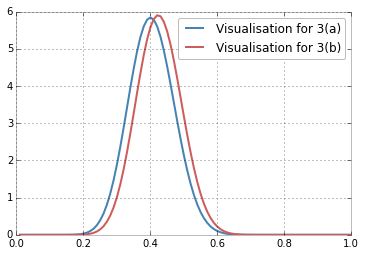

In [3]:
from scipy.stats import beta
a1 = 21.0; a2 = 31.0; b1 = 23.0; b2 =31.0
x = np.linspace(0.01, 1, 100)
y1 = beta.pdf(x, a1, a2)
y2 = beta.pdf(x, b1, b2)

mean1 = a1/(a1+a2)
mean2 = b1/(b1+b2)
var1 = (a1*a2)/((a1+a2)**2 + (a1+a2+1))
var2 = (b1*b2)/((b1+b2)**2 + (b1+b2+1))

plt.plot(x,y1, label = 'Visualisation for 3(a)')
plt.plot(x,y2, label = 'Visualisation for 3(b)')
plt.legend()

print 'Posterior Distribution with mean and variance for 3(a)',mean1,var1
print 'Posterior Distribution with mean and variance for 3(b)',mean2,var2

In [4]:
# data for problem 4
yn=np.array([ 0.12700431,  1.71729997, -0.12607466,  1.00332543,  1.12533601,
       -1.48207777, -1.01622525, -1.00421556, -0.84979125, -0.6707679 ])

### Problem 4 (15% credit)

Consider fitting a normal distribution with a unit variance to a set of points above.

a) Find and visualize the posterior distribution for the probability mean $\mu$ for an uninformative prior belief.

b) Find and visualize the posterior distribution for the probability mean $\mu$ for a prior $\mu\sim {\cal N}(0,1)$.

####Answer 4(a)

Posterior distr = N(-0.106926060909,0.0909090909091)


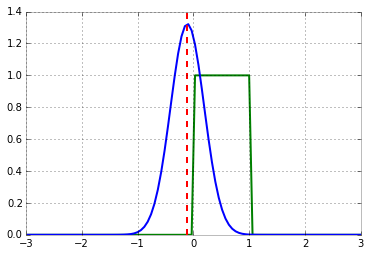

In [5]:
N=len(yn)
sigma2=1

#parameters of the uninformative prior
mu_prior=0
sigma2_prior=1
#estimate parameters of the posterior
sigma2_mu=(N/sigma2+1/sigma2_prior)**-1
mu_est=(np.sum(yn)/sigma2+mu_prior/sigma2_prior)*sigma2_mu

dist=stats.norm(loc=mu_est,scale=sigma2_mu**0.5)
dist_prior=stats.uniform(loc=mu_prior,scale=sigma2_prior**0.5)

#Plotting
x=np.linspace(-3,3,100)
plt.plot(x,dist_prior.pdf(x),color='g')
plt.plot(x,dist.pdf(x),color='b')
plt.axvline(mu_est, color='r', ls='--', lw=2.0)
print('Posterior distr = N({0},{1})'.format(mu_est,sigma2_mu))

####Answer 4(b)

Posterior distr = N(-0.106926060909,0.0909090909091)


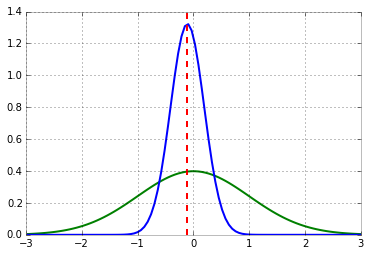

In [6]:
N=len(yn)
sigma2=1 

#Parameters of the normal prior
mu_prior=0
sigma2_prior=1

#Estimate parameters of the posterior
sigma2_mu=(N/sigma2+1/sigma2_prior)**-1
mu_est=(np.sum(yn)/sigma2+mu_prior/sigma2_prior)*sigma2_mu
dist=stats.norm(loc=mu_est,scale=sigma2_mu**0.5)
dist_prior=stats.norm(loc=mu_prior,scale=sigma2_prior**0.5)

#Plotting
x=np.linspace(-3,3,100)
plt.plot(x,dist_prior.pdf(x),color='g')
plt.plot(x,dist.pdf(x),color='b')
plt.axvline(mu_est, color='r', ls='--', lw=2.0)
print('Posterior distr = N({0},{1})'.format(mu_est,sigma2_mu))

In [7]:
# data for problems 5,6
data = pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/homework6/H6.csv' , index_col=0 )
data.head()

,x,y
0,-4.294827,-2.666893
1,-4.354712,-2.555730
2,-5.115582,-4.207329
3,-6.635222,-2.546837
4,-6.241318,-5.326986


### Problem 5 (20% credit)
Given the data above find and visualize a posterior distribution for a univariate linear regression's $y\sim w x$ (without intercept) with a given unit variance $\sigma^2=1$, given the prior $w\sim {\cal} N(0,1)$. Find 95% and 99.9% confidence intervals for $w$ as well as the probability of having $w\in [0.7,1]$. Compare with a standard least-square regression fit (ignoring the prior).

####Answer 5

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1817.
Date:                Wed, 28 Oct 2015   Prob (F-statistic):           1.64e-65
Time:                        00:37:37   Log-Likelihood:                -134.34
No. Observations:                 100   AIC:                             270.7
Df Residuals:                      99   BIC:                             273.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              0.7305      0.017     42.631      0.0

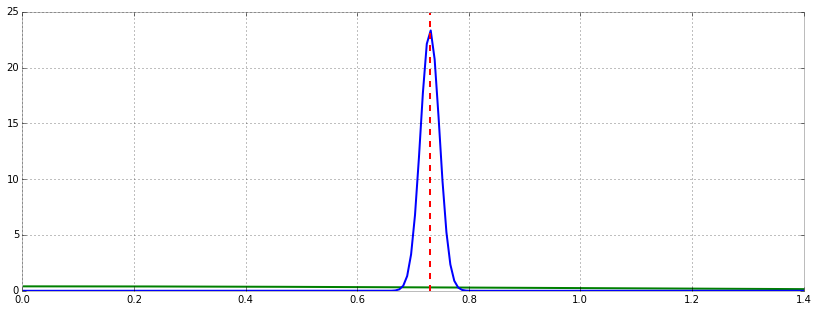

In [8]:
w_prior = 0
sigma2_prior = 1 

#Regression 
model1 = smf.ols(formula='y ~ x -1', data = data).fit()
print(model1.summary())

sigma2 = np.mean((data.y-model1.predict(data))**2)

#estimate parameters of the posterior
sigma2_w = (sum(data.x**2)/sigma2+1/sigma2_prior)**-1
w_est = (sum(data.x*data.y)/sigma2+w_prior/sigma2_prior)*sigma2_w
dist = stats.norm(loc=w_est,scale=sigma2_w**0.5)
dist_prior = stats.norm(loc=w_prior,scale=sigma2_prior**0.5)
print('Posterior distr = N({0},{1}^2)'.format(w_est,sigma2_w**0.5))

#Plotting
x=np.linspace(0,1.4,200)
plt.figure(figsize = (14,5))
plt.plot(x,dist_prior.pdf(x),color='g')
plt.plot(x,dist.pdf(x),color='b')
plt.axvline(w_est, color='r', ls='--', lw=2.0)

 [-----------------100%-----------------] 1000 of 1000 complete in 9.8 secSample mean=0.730530839294,std=0.128720601698
95% confidence interval: 0.69679109103-0.762715179721
99% confidence interval: 0.673813246515-0.796431028851
Probability of having w within [0.7;1]: 0.965


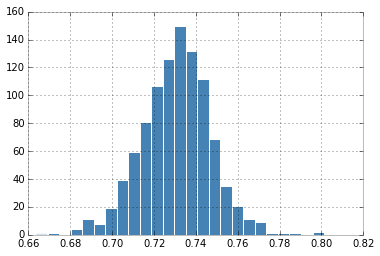

In [9]:
with pm.Model() as model1: #introduce a PyMC3 simulation framework
    #for a normal prior
    w = pm.Normal('w', mu=0, sd=1) 
    #set up the likelohood function of the model
    y_est = w * data.x
    likelihood = pm.Normal('y', mu=y_est, sd=sigma2**0.5, observed=data.y)
    #as well as the model parameters
    start = pm.find_MAP() #use the Maximum a Posteriori (MAP) values as starting values for the MCMC sampling.
    step = pm.NUTS(state=start)
    trace = pm.sample(1000, step, start=start, progressbar=True) #perform 1000 iteration saving them to <trace>
    
sample=trace.w[0:1000]
#output sample parameters
w_est=np.mean(sample) 
sigma_w=np.std(sample)
print('Sample mean={},std={}'.format(w_est,sigma_w**0.5))

plt.hist(sample,25);

ci95=np.percentile(sample, (2.5, 97.5))
print('95% confidence interval: {0}-{1}'.format(ci95[0],ci95[1]))
ci99=np.percentile(sample, (0.1, 99.9))
print('99% confidence interval: {0}-{1}'.format(ci99[0],ci99[1]))

intprob=sum((sample>=0.7)&(sample<=1))/1.0/len(sample)
print('Probability of having w within [0.7;1]: {0}'.format(intprob))

#####The mean (as well as standard deviation) of posterior from both the linear regression and the Bayesian model are very close having values 0.7303 and 0.7305 respectively. The confidence intervals and probability of w between 0.7 and 1 are displayed above.

### Problem 6 (30% credit)

Do the same as for the problem 5 but for a uniform prior $w\sim Unif(0.5,1)$ (performing a numeric estimate with 1000 iteration, considering only last 800 of them). 

####Answer 6

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1817.
Date:                Wed, 28 Oct 2015   Prob (F-statistic):           1.64e-65
Time:                        00:38:55   Log-Likelihood:                -134.34
No. Observations:                 100   AIC:                             270.7
Df Residuals:                      99   BIC:                             273.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              0.7305      0.017     42.631      0.0

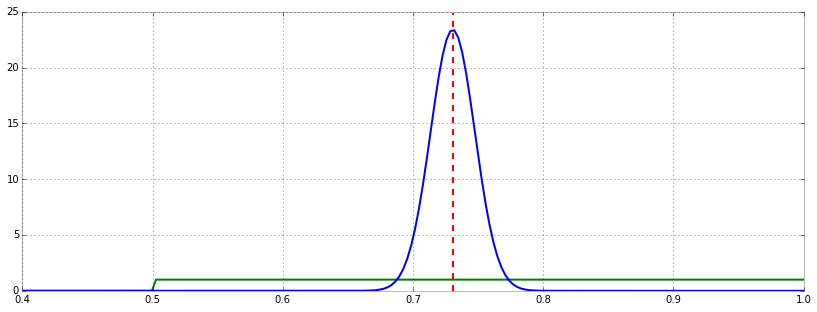

In [10]:
w_prior=0.5
sigma2_prior=1 

#Regression 
model2 = smf.ols(formula='y ~ x -1', data = data).fit()
print(model2.summary())

sigma2=np.mean((data.y-model2.predict(data))**2)

#estimate parameters of the posterior
sigma2_w=(sum(data.x**2)/sigma2+1/sigma2_prior)**-1
w_est=(sum(data.x*data.y)/sigma2+w_prior/sigma2_prior)*sigma2_w
dist=stats.norm(loc=w_est,scale=sigma2_w**0.5)
dist_prior=stats.uniform(loc=w_prior,scale=sigma2_prior**0.5)
print('Posterior distr = N({0},{1}^2)'.format(w_est,sigma2_w**0.5))

#Plotting
x=np.linspace(0.4,1,200)
plt.figure(figsize = (14,5))
plt.plot(x,dist_prior.pdf(x),color='g')
plt.plot(x,dist.pdf(x),color='b')
plt.axvline(w_est, color='r', ls='--', lw=2.0)

 [-----------------100%-----------------] 1000 of 1000 complete in 12.1 secSample mean=0.730421549133,std=0.130327765552
95% confidence interval: 0.695358202546-0.763696643803
99% confidence interval: 0.671769773128-0.797399038873
Probability of having w within [0.7;1]: 0.9625


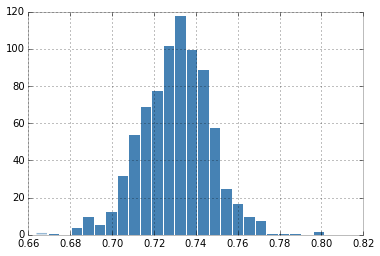

In [11]:
with pm.Model() as model2: #introduce a PyMC3 simulation framework
    #for a uniform prior
    w = pm.Uniform('w', lower=0.5, upper=1) 
    #set up the likelohood function of the model
    y_est = w * data.x
    likelihood = pm.Normal('y', mu=y_est, sd=sigma2**0.5, observed=data.y)
    #as well as the model parameters
    start = pm.find_MAP() #use the Maximum a Posteriori (MAP) values as starting values for the MCMC sampling.
    step = pm.NUTS(state=start)
    trace2 = pm.sample(1000, step, start=start, progressbar=True) #perform 1000 iteration saving them to <trace>
    
sample=trace.w[200:1000] #ignore first 200 burn in steps
#output sample parameters
w_est=np.mean(sample) 
sigma_w=np.std(sample)
print('Sample mean={},std={}'.format(w_est,sigma_w**0.5))

plt.hist(sample,25);

ci95=np.percentile(sample, (2.5, 97.5))
print('95% confidence interval: {0}-{1}'.format(ci95[0],ci95[1]))
ci99=np.percentile(sample, (0.1, 99.9))
print('99% confidence interval: {0}-{1}'.format(ci99[0],ci99[1]))

intprob=sum((sample>=0.7)&(sample<=1))/1.0/len(sample)
print('Probability of having w within [0.7;1]: {0}'.format(intprob))